<a href="https://colab.research.google.com/github/ramaniksai7/DS-python/blob/master/11_07_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE CLASSIFICATION


# DATA COLLECTION

In [33]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip



--2020-07-11 05:43:09--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 172.217.194.128, 2404:6800:4003:c04::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  58.8MB/s    in 1.1s    

2020-07-11 05:43:11 (58.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



main folder
- train-- cats and dogs
- validation-- cats and dogs

In [34]:
import os
import zipfile
local_zip="/tmp/cats_and_dogs_filtered.zip"
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [35]:
os.listdir("/tmp/cats_and_dogs_filtered") #the subfiles under the zip file

['vectorize.py', 'validation', 'train']

In [36]:
os.listdir("/tmp/cats_and_dogs_filtered/train")# files under train

['cats', 'dogs']

In [37]:
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/cats")))
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/dogs")))

1000
1000


In [38]:
base_dir="/tmp/cats_and_dogs_filtered"
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
## directory with training cat pictures
train_cat_dir=os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [39]:
## file names
train_cat_filenames=os.listdir(train_cat_dir)
train_cat_filenames[:4]

['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg']

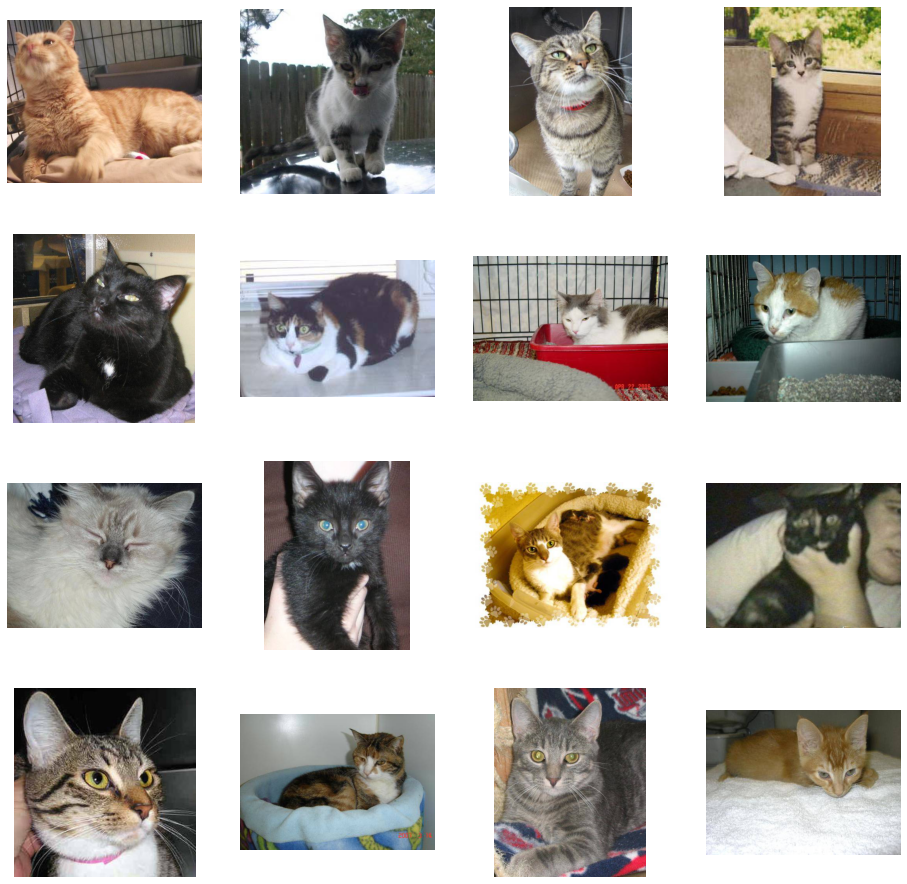

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j=1 #plot position
for i in range(16):
  img=plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.axis('off')
  j += 1

read the images data <br>
we have different shapes here<br>
we need same shape for each and every image<br>
reshaping the images<br>
cats and dogs labbelling<br>



# Creating Train and valiadtion data from Folder


In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [42]:
train_generator

(20, 150, 150, 3)
(20,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


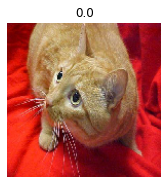

In [43]:
imgs,labels = train_generator.next()
#print(i)
print(imgs.shape)
print(labels.shape)
p = 1 
plt.figure(figsize=(16,16))
for j in range(20):
  plt.subplot(4,5,p)
  plt.imshow(imgs[j,:,:,:])
  plt.title(labels[j])
  plt.axis("off")

In [44]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

In [45]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
model = Sequential()

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(16, 3, activation='relu',input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(2))

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
model.add(Flatten())

# Create a fully connected layer with ReLU activation and 512 hidden units
model.add(Dense(512, activation='relu'))

# Create output layer with a single node and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

(20, 150, 150, 3)
(20,)


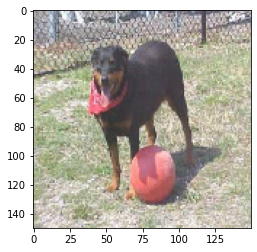

In [46]:
imgs,labels=train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])


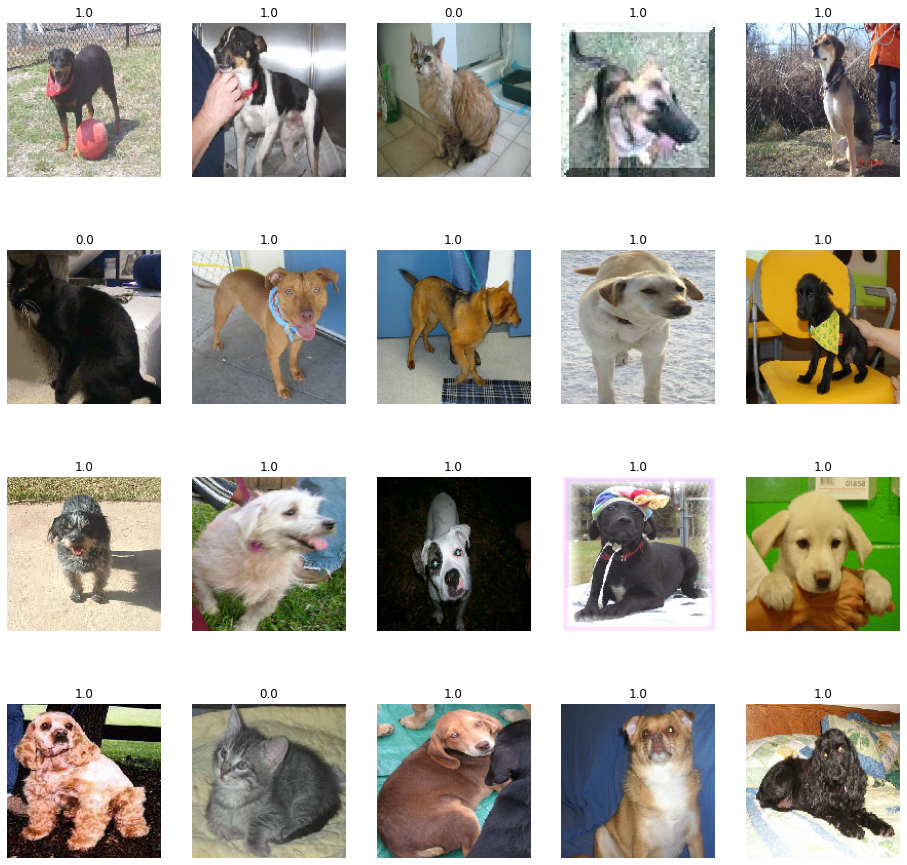

In [47]:
plt.figure(figsize=(16,16))
pos=1 ##plot position
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:]) #display the image
  plt.title(labels[i])
  plt.axis('off')
  pos+=1

# o-->dogs
# 1-->cats

# build the model

In [48]:
##import required metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [49]:
model = Sequential()
## add a conv layer folloed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer folloed by maxpooling
model.add(Conv2D(16,3,activation='relu'))
model.add(MaxPooling2D(2))
## add a conv layer folloed by maxpooling
model.add(Conv2D(16,3,activation='relu'))
model.add(MaxPooling2D(2))
# convert the feature into 1D array
model.add(Flatten())
# Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
## Final output layer
model.add(Dense(1,activation='sigmoid'))

## let us see the the summary 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 16)        2320      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4624)             

In [50]:
### Compiling the model
import tensorflow as tf
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

# Train the model

In [51]:
history = model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 9s 87ms/step - loss: 0.7550 - accuracy: 0.5585 - val_loss: 0.6470 - val_accuracy: 0.6490
Epoch 2/15
100/100 [==============================] - 8s 85ms/step - loss: 0.6387 - accuracy: 0.6545 - val_loss: 0.6487 - val_accuracy: 0.6240
Epoch 3/15
100/100 [==============================] - 8s 84ms/step - loss: 0.5805 - accuracy: 0.7090 - val_loss: 0.6240 - val_accuracy: 0.6680
Epoch 4/15
100/100 [==============================] - 8s 85ms/step - loss: 0.5021 - accuracy: 0.7610 - val_loss: 0.6339 - val_accuracy: 0.6670
Epoch 5/15
100/100 [==============================] - 8s 83ms/step - loss: 0.4144 - accuracy: 0.8075 - val_loss: 0.7557 - val_accuracy: 0.6560
Epoch 6/15
100/100 [==============================] - 8s 83ms/step - loss: 0.3243 - accuracy: 0.8625 - val_loss: 0.7760 - val_accuracy: 0.6710
Epoch 7/15
100/100 [==============================] - 8s 83ms/step - loss: 0.2126 - accuracy: 0.9235 - val_loss: 0.9272 - val_accuracy: 0.6710

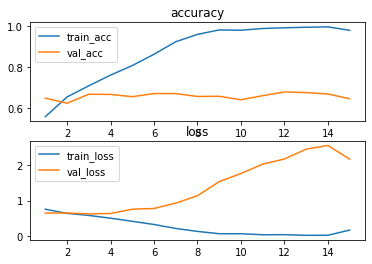

In [63]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

##### To predict for an image


1.   Read the image
2.   check the shape

1.   Resize into required shape(1,150*150*3)
2.   Apply scaling

In [61]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/tmp/dog.jpg')
print(type(img))
#print(img.shape)
img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img = tf.image.resize(img,(150,150))
img = img/255
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(1499, 1999, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


In [62]:
model.predict(img)

array([[0.44948995]], dtype=float32)